In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
%matplotlib inline

In [3]:
train_df = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
test_df = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train_df.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1127,1128,20,RL,182.0,14572,Pave,NaN,IR3,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Family,259000
480,481,20,RL,98.0,16033,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2006,WD,Normal,326000
864,865,20,FV,72.0,8640,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,New,Partial,250580
551,552,20,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,112500
927,928,60,RL,NaN,9900,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,4,2008,WD,Normal,176000
857,858,60,RL,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Normal,174000
156,157,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500
1392,1393,85,RL,68.0,7838,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnWw,NaN,0,12,2006,WD,Normal,123000
1296,1297,20,RL,80.0,8700,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,12,2008,WD,Normal,155000
40,41,20,RL,84.0,8658,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,12,2006,WD,Abnorml,160000


In [6]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
print(train_df['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


Text(0, 0.5, 'Number of the houses')

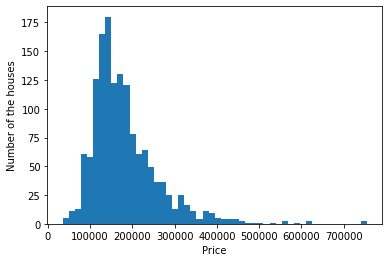

In [8]:
#Histogram of sale prices
plt.hist(train_df.SalePrice,bins=50)
plt.xlabel('Price')
plt.ylabel('Number of the houses')

In [9]:
#plot the LotFrontage
#plt.scatter(train_df.iloc[:,3],"SalePrice")

#plt.ylabel('Sale Price')
#plt.xlabel('LotFrontage')

In [10]:
obj=train_df.isnull().sum()
for key,value in obj.iteritems():
    print(key,",",value)

Id , 0
MSSubClass , 0
MSZoning , 0
LotFrontage , 259
LotArea , 0
Street , 0
Alley , 1369
LotShape , 0
LandContour , 0
Utilities , 0
LotConfig , 0
LandSlope , 0
Neighborhood , 0
Condition1 , 0
Condition2 , 0
BldgType , 0
HouseStyle , 0
OverallQual , 0
OverallCond , 0
YearBuilt , 0
YearRemodAdd , 0
RoofStyle , 0
RoofMatl , 0
Exterior1st , 0
Exterior2nd , 0
MasVnrType , 8
MasVnrArea , 8
ExterQual , 0
ExterCond , 0
Foundation , 0
BsmtQual , 37
BsmtCond , 37
BsmtExposure , 38
BsmtFinType1 , 37
BsmtFinSF1 , 0
BsmtFinType2 , 38
BsmtFinSF2 , 0
BsmtUnfSF , 0
TotalBsmtSF , 0
Heating , 0
HeatingQC , 0
CentralAir , 0
Electrical , 1
1stFlrSF , 0
2ndFlrSF , 0
LowQualFinSF , 0
GrLivArea , 0
BsmtFullBath , 0
BsmtHalfBath , 0
FullBath , 0
HalfBath , 0
BedroomAbvGr , 0
KitchenAbvGr , 0
KitchenQual , 0
TotRmsAbvGrd , 0
Functional , 0
Fireplaces , 0
FireplaceQu , 690
GarageType , 81
GarageYrBlt , 81
GarageFinish , 81
GarageCars , 0
GarageArea , 0
GarageQual , 81
GarageCond , 81
PavedDrive , 0
WoodDeckSF ,

<AxesSubplot:>

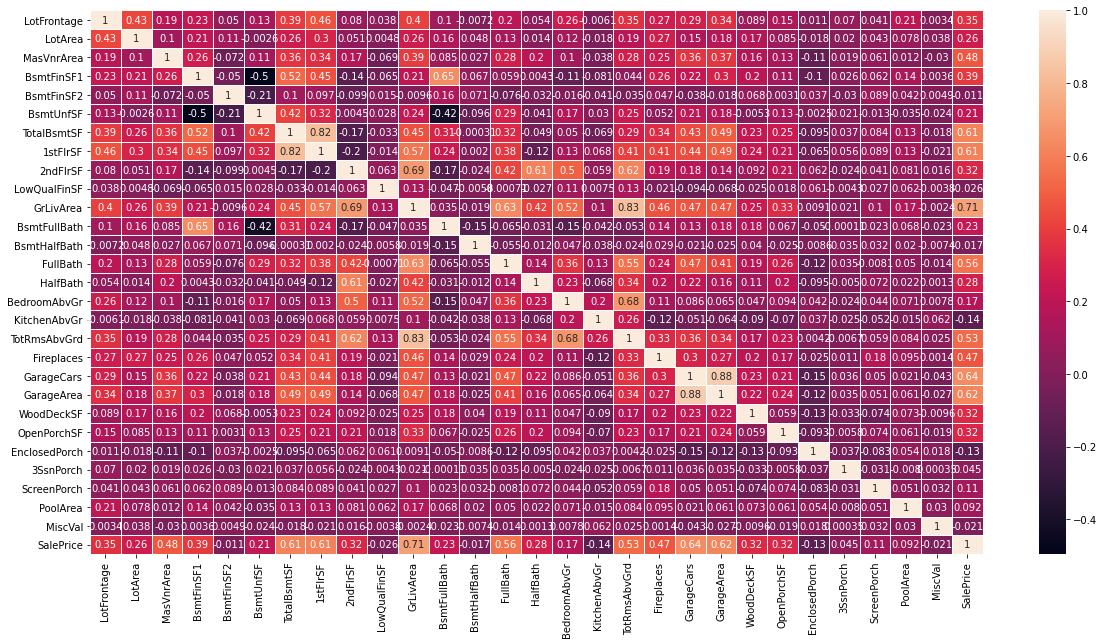

In [11]:
#Numerical feature correlation
plt.figure(figsize = (20,10))
internal_chars = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                 'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF',
                 'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','SalePrice']
corrmat = train_df[internal_chars].corr()
sns.heatmap(corrmat,square=False,linewidths=.5,annot=True)

In [12]:
print(corrmat["SalePrice"].sort_values(ascending=False))

SalePrice        1.000000
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


looks like GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath features have high correlation to the saleprice.

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

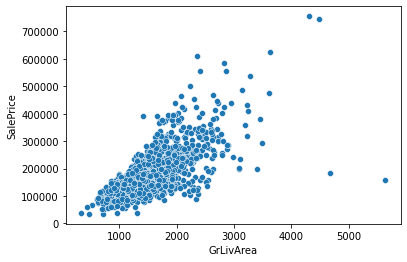

In [13]:
#Deal with outliers in GrLivArea
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train_df)

In [14]:
train_df[(train_df['GrLivArea']>4000) & (train_df['SalePrice']<400000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [15]:
train_df[(train_df['GrLivArea']>4000) & (train_df['SalePrice']<400000)].index

Int64Index([523, 1298], dtype='int64')

In [16]:
ind_drop = train_df[(train_df['GrLivArea']>4000) & (train_df['SalePrice']<400000)].index

In [17]:
train_df = train_df.drop(ind_drop,axis=0)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

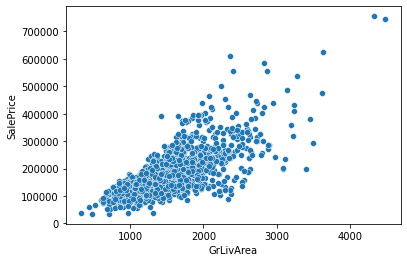

In [18]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train_df)

In [19]:
#drop the columns which has a lot of missing values
train_df.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [20]:
#deal with missing values
train_df.isnull().sum().sort_values(ascending=False)

GarageType      81
GarageCond      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
                ..
BsmtUnfSF        0
TotalBsmtSF      0
MSSubClass       0
HeatingQC        0
SalePrice        0
Length: 75, dtype: int64

In [21]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [22]:
percent_nan = percent_missing(train_df)

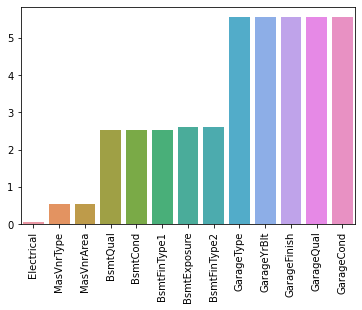

In [23]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [24]:
#for numerical features,fill in with 0
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(0)
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(0)

In [25]:
#for categorical features, fill in with 'None'
cat_mis_cols = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
               'Electrical','GarageType','GarageFinish','GarageQual','GarageCond']
train_df[cat_mis_cols] = train_df[cat_mis_cols].fillna('None')

In [26]:
train_df.isnull().sum().sort_values(ascending=False)

Id              0
GarageYrBlt     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
               ..
MasVnrArea      0
MasVnrType      0
Exterior2nd     0
Exterior1st     0
SalePrice       0
Length: 75, dtype: int64

In [27]:
#Covert categorical values to numerical values
with open('../input/house-prices-advanced-regression-techniques/data_description.txt','r') as f: 
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [28]:
#Convert 'MSSubClass' to string
train_df['MSSubClass'] = train_df['MSSubClass'].apply(str)

In [29]:
#Creat "dummy" variables
train_df.select_dtypes(include='object')

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,70,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [30]:
train_df_nums = train_df.select_dtypes(exclude='object')
train_df_objs = train_df.select_dtypes(include='object')

In [31]:
train_df_nums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1458 non-null   int64  
 1   LotArea        1458 non-null   int64  
 2   OverallQual    1458 non-null   int64  
 3   OverallCond    1458 non-null   int64  
 4   YearBuilt      1458 non-null   int64  
 5   YearRemodAdd   1458 non-null   int64  
 6   MasVnrArea     1458 non-null   float64
 7   BsmtFinSF1     1458 non-null   int64  
 8   BsmtFinSF2     1458 non-null   int64  
 9   BsmtUnfSF      1458 non-null   int64  
 10  TotalBsmtSF    1458 non-null   int64  
 11  1stFlrSF       1458 non-null   int64  
 12  2ndFlrSF       1458 non-null   int64  
 13  LowQualFinSF   1458 non-null   int64  
 14  GrLivArea      1458 non-null   int64  
 15  BsmtFullBath   1458 non-null   int64  
 16  BsmtHalfBath   1458 non-null   int64  
 17  FullBath       1458 non-null   int64  
 18  HalfBath

In [32]:
train_df_objs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1458 non-null   object
 1   MSZoning       1458 non-null   object
 2   Street         1458 non-null   object
 3   LotShape       1458 non-null   object
 4   LandContour    1458 non-null   object
 5   Utilities      1458 non-null   object
 6   LotConfig      1458 non-null   object
 7   LandSlope      1458 non-null   object
 8   Neighborhood   1458 non-null   object
 9   Condition1     1458 non-null   object
 10  Condition2     1458 non-null   object
 11  BldgType       1458 non-null   object
 12  HouseStyle     1458 non-null   object
 13  RoofStyle      1458 non-null   object
 14  RoofMatl       1458 non-null   object
 15  Exterior1st    1458 non-null   object
 16  Exterior2nd    1458 non-null   object
 17  MasVnrType     1458 non-null   object
 18  ExterQual      1458 non-null

In [33]:
#Coverting to dummy variable
train_df_objs = pd.get_dummies(train_df_objs,drop_first=True)

In [34]:
final_train_df = pd.concat([train_df_nums,train_df_objs],axis=1)

In [35]:
final_train_df

,Id,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,2,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,3,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,4,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,5,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,7917,6,5,1999,2000,0.0,0,0,953,...,0,0,0,0,1,0,0,0,1,0
1456,1457,13175,6,6,1978,1988,119.0,790,163,589,...,0,0,0,0,1,0,0,0,1,0
1457,1458,9042,7,9,1941,2006,0.0,275,0,877,...,0,0,0,0,1,0,0,0,1,0
1458,1459,9717,5,6,1950,1996,0.0,49,1029,0,...,0,0,0,0,1,0,0,0,1,0


In [36]:
final_train_df.corr()['SalePrice'].sort_values()

ExterQual_TA       -0.589909
KitchenQual_TA     -0.519821
BsmtQual_TA        -0.452785
GarageFinish_Unf   -0.410942
MasVnrType_None    -0.368020
                      ...   
GarageCars          0.641047
TotalBsmtSF         0.651153
GrLivArea           0.734968
OverallQual         0.795774
SalePrice           1.000000
Name: SalePrice, Length: 255, dtype: float64

In [37]:
#Machine learning
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from imblearn.pipeline import make_pipeline

from sklearn import preprocessing
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# models
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
#Drop "Id" column
final_train_df.drop(['Id'],axis=1,inplace =True)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X = final_train_df.drop('SalePrice',axis=1)
y = final_train_df['SalePrice']

In [54]:
from sklearn.preprocessing import StandardScaler

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [65]:
#scaler = StandardScaler()

In [66]:
#scaled_X_train = scaler.fit_transform(X_train)
#scaled_X_test = scaler.transform(X_test)

In [67]:
model = LinearRegression()

In [68]:
model.fit(X_train,y_train)

LinearRegression()

In [69]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.svm import SVR,LinearSVR

In [70]:
test_predictions = model.predict(X_test)

In [71]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [72]:
RMSE

28230.192932544884

In [73]:
train_df['SalePrice'].mean()

180932.91906721535

In [74]:
#SVM regression
s_model = SVR()
s_model.fit(X_train,y_train)

SVR()

In [78]:
test_predictions = s_model.predict(X_test)

In [79]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [80]:
RMSE

81525.88958335729

The linear regression model performs better.